In [1]:
import pandas as pd
from pandas_datareader import data as pdr
from datetime import date
import yfinance as yf
yf.pdr_override()
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
def SaveData(df, filename):
    df.to_csv(r'data/'+filename+'.csv')
    
def GetData(ticker_list):
    print(ticker_list)
    df=[]
    for ticker in ticker_list:
        #print(ticker)
        data = pdr.get_data_yahoo(ticker, start=start_date, end=end_date, progress=False)
        data['Symbol'] = ticker 
        df.append(data)
    print("Data Download Completed")
    return df

In [3]:
# Tickers list to download
ticker_list=['NIO','AAPL', 'V', 'MSFT', 'BAC', 'JPM', 'NFLX', 'SPX']

# Dates
today = date.today()
start_date = '2016-1-1'
end_date = today

# Get the Data
df = GetData(ticker_list)
df = pd.concat(df)
df = df.reset_index()
df = df[['Date', 'Adj Close', 'Symbol']]
stocks = df.pivot('Date','Symbol','Adj Close').reset_index()
SaveData(stocks,str(start_date)+'|'+str(end_date))

['NIO', 'AAPL', 'V', 'MSFT', 'BAC', 'JPM', 'NFLX', 'SPX']
Data Download Completed


In [4]:
# Calculate daily log returns
daily_returns = np.log(stocks[ticker_list]/stocks[ticker_list].shift(-1))
daily_returns.insert(0, 'Date', stocks['Date'])

# Calculate daily standard deviation of returns
daily_std = np.std(daily_returns)

# Annualized daily standard deviation
std = daily_std * 252 ** 0.5

# Computing weekly volatility for log returns
""" 
This is not something usually done we can compute a weekly (5 open days) rolling window and compute std 
to have this time series but why not use GARCH with the Annualized daily STD ?
"""
weekly_volatility = daily_returns.rolling(5).std()

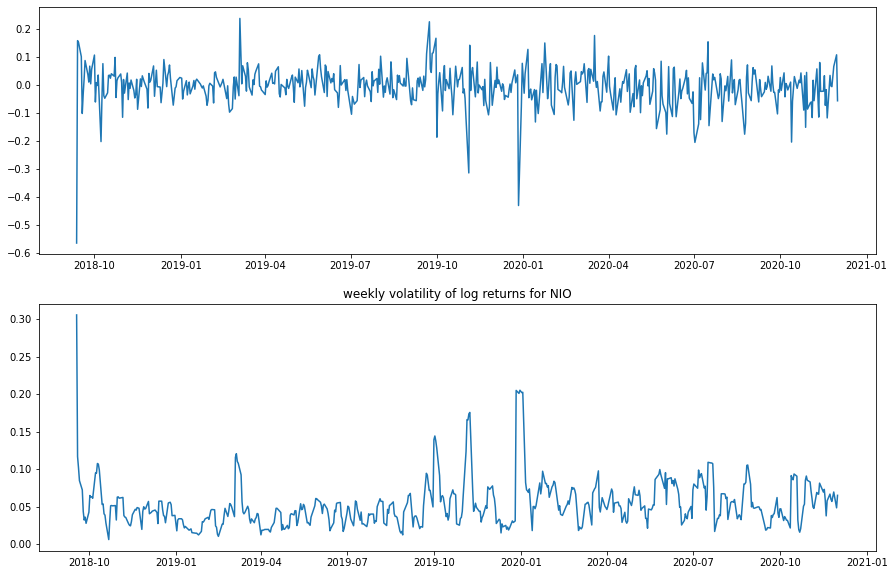

In [5]:
fig, ax = plt.subplots(2,1, figsize=(15,10))

plt.title('daily log returns for NIO')
ax[0].plot(daily_returns['Date'], daily_returns['NIO'])

plt.title('weekly volatility of log returns for NIO')
ax[1].plot(daily_returns['Date'], weekly_volatility['NIO'])

plt.show()

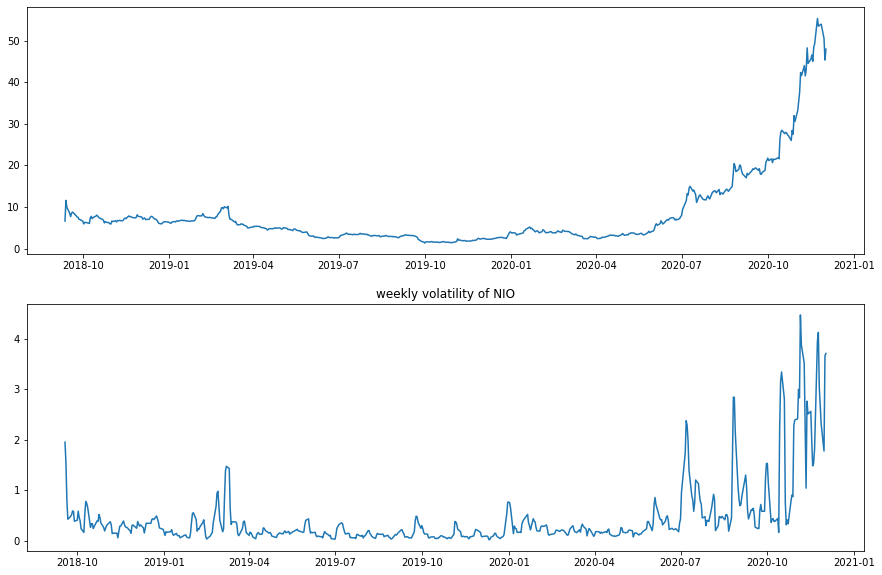

In [6]:
# Computing weekly volatility for the stocks
stocks_weekly_volatility = stocks.rolling(5).std()

fig, ax = plt.subplots(2,1, figsize=(15,10))

plt.title('NIO Stock')
ax[0].plot(stocks['Date'], stocks['NIO'])

plt.title('weekly volatility of NIO')
ax[1].plot(stocks['Date'], stocks_weekly_volatility['NIO'])

plt.show()